<a href="https://colab.research.google.com/github/kyshc176/Sistem-Rekomendasi-Buku/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tabulate import tabulate

Pada tahap awal ini, dilakukan proses import berbagai library yang digunakan dalam proyek ini, meliputi:

- **Pandas, NumPy**: Untuk manipulasi dan analisis data berbasis tabel (DataFrame) dan array numerik.
- **Matplotlib**: Untuk membuat visualisasi data dalam bentuk grafik atau plot.
- **TensorFlow, Keras**: Untuk membangun, melatih, dan menguji model deep learning menggunakan berbagai jenis layer.
- **Tabulate**: Untuk menampilkan output data dalam format tabel yang rapi dan mudah dibaca di console atau laporan.

### Load the dataset

Dataset dibaca menggunakan fungsi `pandas.read_csv()`, yang digunakan untuk memuat data dari file CSV ke dalam format DataFrame agar dapat dianalisis lebih lanjut.

In [ ]:
books = pd.read_csv("book-dataset/books.csv")
ratings = pd.read_csv("book-dataset/ratings.csv")
users = pd.read_csv("book-dataset/users.csv")

C:\Users\unoto\AppData\Local\Temp\ipykernel_18944\1353837609.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("book-dataset/books.csv")


In [ ]:
# dataset books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# dataset ratings
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# dataset users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print('Jumlah data buku:', len(books.ISBN.unique()))
print('Jumlah data rating buku dari pembaca:', len(ratings.ISBN.unique()))
print('jumlah data pengguna:', len(users['User-ID'].unique()))

Jumlah data buku: 271360
Jumlah data rating buku dari pembaca: 340556
jumlah data pengguna: 278858


Berdasarkan output yang ditampilkan, diperoleh informasi struktur dari tiga variabel utama dalam dataset:

### 1. `books` (271.360 data, 8 kolom)
Berisi informasi detail tentang buku:
- `ISBN`: Nomor identitas unik untuk setiap buku.
- `Book-Title`: Judul buku.
- `Book-Author`: Nama penulis buku.
- `Year-Of-Publication`: Tahun terbit buku.
- `Publisher`: Nama penerbit buku.
- `Image-URL-S`: URL gambar buku ukuran kecil.
- `Image-URL-M`: URL gambar buku ukuran sedang.
- `Image-URL-L`: URL gambar buku ukuran besar.

### 2. `ratings` (340.556 data, 3 kolom)
Mencatat penilaian pengguna terhadap buku:
- `User-ID`: Kode unik pengguna anonim.
- `ISBN`: Nomor identitas buku.
- `Book-Rating`: Nilai rating yang diberikan pengguna.

### 3. `users` (278.858 data, 3 kolom)
Menyimpan informasi pengguna:
- `User-ID`: Kode unik pengguna anonim.
- `Location`: Lokasi tempat tinggal pengguna.
- `Age`: Usia pengguna.

## Univariate Exploratory Data Analysis

Pada tahap ini dilakukan analisis eksploratif terhadap masing-masing variabel untuk memahami distribusi, karakteristik, serta pola awal yang ada pada data. Pemahaman ini akan membantu dalam memilih strategi dan algoritma yang tepat untuk proses rekomendasi buku.

### Variabel dalam Book Recommendation Dataset:
- **books**: Berisi informasi detail tentang buku, seperti judul, penulis, penerbit, tahun terbit, dan link gambar.
- **ratings**: Memuat data rating atau penilaian yang diberikan pengguna terhadap buku.
- **users**: Berisi informasi pengguna, termasuk lokasi dan usia sebagai bagian dari data demografis.

### Books Variabel

Langkah pertama dalam eksplorasi data adalah memeriksa isi awal dan struktur dari dataset `books`. Hal ini dilakukan untuk memastikan data berhasil dimuat dengan benar serta memahami tipe data pada setiap kolom.

### Langkah-langkah:
- Gunakan `head()` untuk melihat 5 baris pertama dari dataset.
- Gunakan `info()` untuk melihat jumlah entri, tipe data tiap kolom, dan nilai non-null pada dataset `books`.

Langkah ini penting untuk mengidentifikasi potensi masalah awal seperti missing value, tipe data yang tidak sesuai, atau struktur data yang perlu dibersihkan.

In [ ]:
# cek informasi dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


Berdasarkan output dari `books.info()`, diketahui bahwa dataset `books.csv` terdiri dari:

- **Jumlah entri**: 271.360 baris data
- **Jumlah kolom**: 8 kolom, yaitu:
  - `ISBN`
  - `Book-Title`
  - `Book-Author`
  - `Year-Of-Publication`
  - `Publisher`
  - `Image-URL-S`
  - `Image-URL-M`
  - `Image-URL-L`


## Top 10 Writer

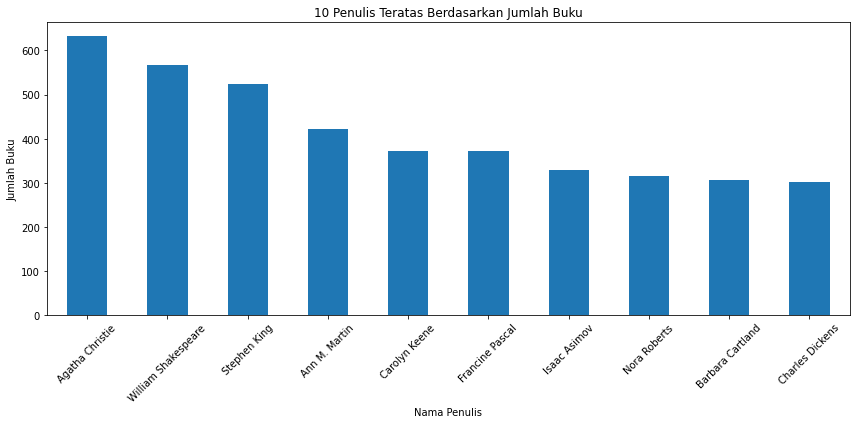

In [ ]:
# Grouping'Book-Author' dan hitung jumlah buku yang ditulis oleh masing-masing penulis
author_counts = books.groupby('Book-Author')['Book-Title'].count()

# Urutkan penulis dalam urutan menurun
sorted_authors = author_counts.sort_values(ascending=False)

# Pilih 10 penulis teratas
top_10_authors = sorted_authors.head(10)

# Plot 10 penulis teratas dan buku yang ditulis oleh penulis kemudian dihitung menggunakan plot batang
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar')
plt.xlabel('Nama Penulis')
plt.ylabel('Jumlah Buku')
plt.title('10 Penulis Teratas Berdasarkan Jumlah Buku')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dari data yang dianalisis, diketahui bahwa:

- Penulis **Agatha Christie** menulis buku terbanyak, yaitu lebih dari 600 judul.
- Dataset ini juga mengandung banyak penulis yang memiliki lebih dari satu judul buku.

Informasi ini penting untuk memahami distribusi kontribusi penulis dalam dataset dan dapat menjadi dasar dalam pengembangan sistem rekomendasi berbasis penulis.

### Ratings Variabel

Selanjutnya, dilakukan eksplorasi pada variabel `ratings` yang berisi penilaian buku dari pengguna. Data ini akan menjadi dasar dalam pengembangan model **collaborative filtering**.

Untuk memahami struktur dan kualitas data, gunakan fungsi `info()` untuk melihat jumlah entri, tipe data, dan nilai yang tidak kosong pada setiap kolom di dataset `ratings`.

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


Berdasarkan output sebelumnya, dataset `ratings` memiliki:

- **Jumlah entri**: 1.149.780 baris
- **Kolom**: 3 kolom utama, yaitu:
  - `User-ID`: kode unik pengguna anonim
  - `ISBN`: nomor identitas unik buku
  - `Book-Rating`: nilai rating yang diberikan pengguna terhadap buku


In [ ]:
print('Jumlah User-ID:', len(ratings['User-ID'].unique()))
print('Jumlah buku berdasarkan ISBN:', len(ratings['ISBN'].unique()))

print('Jumlah rating buku:')
sorted_ratings = ratings['Book-Rating'].value_counts().sort_index()
pd.DataFrame({'Book-Rating': sorted_ratings.index, 'Jumlah': sorted_ratings.values})

Jumlah User-ID: 105283
Jumlah buku berdasarkan ISBN: 340556
Jumlah rating buku:


,Book-Rating,Jumlah
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


Dari hasil analisis diketahui bahwa:

- Terdapat **105.283 pengguna unik** yang memberikan rating buku.
- Jumlah buku yang mendapat rating berdasarkan ISBN adalah **340.556 buku**.
- Rating yang diberikan memiliki rentang nilai dari **0 (paling rendah)** hingga **10 (paling tinggi)**.

Informasi ini penting sebagai dasar pemahaman skala rating untuk pengembangan model rekomendasi.

Dataset `ratings` memiliki lebih dari 1 juta baris, yang cukup besar dan memakan banyak memori saat pelatihan model.

Oleh karena itu, untuk menghemat memori dan mempercepat proses, hanya **5.000 data pertama** (baris indeks 0 hingga 4999) yang akan digunakan dalam pengembangan model collaborative filtering.

Dataset hasil pemangkasan ini kemudian disimpan dengan nama variabel baru `df_rating` agar tidak membingungkan dengan dataset asli.

In [ ]:
df_rating = ratings[:20000]
df_rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
19995,3757,843222264X,7
19996,3757,8432222658,7
19997,3757,8432222666,7
19998,3757,8432222674,7


### Users Variabel

Variabel `users` berisi informasi tentang pengguna anonim beserta data demografisnya.

Untuk memahami struktur data dan kualitas kolom, gunakan fungsi `info()` untuk melihat jumlah entri, tipe data, dan nilai non-null di setiap kolom.

In [ ]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Dari output `users.info()`, diketahui bahwa dataset `users` memiliki:

- **278.858 entri**
- 3 kolom utama:
  - `User-ID`: kode unik pengguna anonim
  - `Location`: lokasi tempat tinggal pengguna
  - `Age`: usia pengguna (terdapat nilai yang tidak diketahui/bermasalah)

Dataset `users` berguna untuk pengembangan sistem rekomendasi berbasis demografi atau kondisi sosial pengguna. Namun, untuk studi kasus ini, data `users` **tidak akan digunakan** dalam model.

Model rekomendasi yang akan dikembangkan hanya menggunakan data dari **`books` dan `ratings`**.

## Data Preprocessing

### Menggabungkan Dataset dan Menghitung Jumlah Rating

Langkah selanjutnya adalah menggabungkan dataset `books` dan `ratings` berdasarkan kolom `ISBN`. Penggabungan ini berguna untuk mengaitkan informasi buku dengan rating yang diberikan oleh pengguna.

Setelah penggabungan, kita dapat menghitung jumlah total rating yang ada untuk analisis lebih lanjut.

In [ ]:
# Menggabungkan dataframe ratings dengan books berdasarkan nilai ISBN
books = pd.merge(ratings, books, on='ISBN', how='left')
books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books
1149778,276721,0590442449,10,Fourth Grade Rats,Jerry Spinelli,1996.0,Scholastic


Setelah penggabungan dataset `books` dan `ratings`, diperoleh dataset baru dengan **7 kolom** dan **1.149.780 baris** data.

Dataset ini menjadi dasar untuk pengembangan sistem rekomendasi buku.

Selanjutnya, dilakukan perhitungan jumlah rating yang diterima setiap buku berdasarkan `ISBN` menggunakan kode berikut:

In [ ]:
books.groupby('ISBN').sum()

,User-ID,Book-Rating,Year-Of-Publication
ISBN,,,
0330299891,271009,6,0.0
0375404120,356057,3,0.0
0586045007,89192,0,0.0
9022906116,100868,7,0.0
9032803328,89192,0,0.0
...,...,...,...
cn113107,107301,0,0.0
ooo7156103,266146,7,0.0
§423350229,85250,0,0.0


# Data Preparation

Pada tahap ini dilakukan beberapa teknik penting untuk mempersiapkan data agar siap digunakan dalam pengembangan sistem rekomendasi berbasis konten, yaitu:

- **Menghilangkan missing value** untuk memastikan kualitas data yang bersih dan lengkap.
- **Menyamakan jenis buku berdasarkan ISBN**, karena pada sistem rekomendasi berbasis konten satu nomor ISBN harus mewakili satu judul buku yang unik.

Persiapan ini penting agar data valid dan konsisten selama proses pelatihan model.

Saat mencoba mengonversi kolom `Year-Of-Publication` ke tipe data integer, muncul error:

Hal ini menunjukkan bahwa terdapat data yang seharusnya berupa tahun, namun justru berisi teks. Setelah ditelusuri, ditemukan **dua nilai tidak valid**, yaitu:

- `'DK Publishing Inc'`
- `'Gallimard'`

Nilai-nilai ini merupakan **kesalahan input** dan perlu dihapus dari dataset agar tidak mengganggu proses konversi tipe data.

In [ ]:
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Menghapus value pada 'Year-Of-Publication' yang bernilai teks tersebut.

In [ ]:
temp = (books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')
books = books.drop(books[temp].index)
books[(books['Year-Of-Publication'] == 'DK Publishing Inc') | (books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


Mengubah tipe data pada 'Year-Of-Publication'.

In [ ]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)
print(books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object


Setelah kolom `Year-Of-Publication` berhasil dikonversi ke tipe integer, selanjutnya dilakukan pembersihan data dengan menghapus kolom yang tidak relevan untuk pengembangan model rekomendasi berbasis konten.

Karena sistem rekomendasi akan fokus pada informasi buku berupa **judul** dan **penulis**, maka kolom yang berisi URL gambar (`Image-URL-S`, `Image-URL-M`, `Image-URL-L`) tidak diperlukan dan dapat dihapus untuk menyederhanakan dataset serta mengurangi beban komputasi.

In [ ]:
# Menghapus kolom Image-URL semua ukuran
books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Setelah di hapus kolom Image-URL sekarang dataset hanya tersisa 5 kolom/variabel saja.

In [ ]:
print("Jumlah nomor ISBN Buku:", len(books['ISBN'].unique()))
print("Jumlah judul buku:", len(books['Book-Title'].unique()))
print('Jumlah penulis buku:', len(books['Book-Author'].unique()))
print('Jumlah Tahun Publikasi:', len(books['Year-Of-Publication'].unique()))
print('Jumlah nama penerbit:', len(books['Publisher'].unique()))

Jumlah nomor ISBN Buku: 271357
Jumlah judul buku: 242132
Jumlah penulis buku: 102022
Jumlah Tahun Publikasi: 116
Jumlah nama penerbit: 16805


Berdasarkan output sebelumnya, diketahui:

- Jumlah **judul buku** unik: 242.135
- Jumlah **nomor ISBN** unik: 271.357

Hal ini mengindikasikan adanya buku yang **tidak memiliki nomor ISBN unik** atau terjadi duplikasi pada kolom ISBN, padahal setiap buku harus memiliki satu nomor ISBN yang unik.

### Tindakan selanjutnya:
Dataset akan difilter untuk memastikan setiap buku memiliki nomor ISBN yang valid dan unik, guna menjaga konsistensi data dalam proses pengembangan model rekomendasi.

### Mengatasi Missing Value

In [ ]:
# Cek missing value dengan fungsi isnull()
books.isnull().sum()

User-ID                     0
ISBN                        0
Book-Rating                 0
Book-Title             118648
Book-Author            118649
Year-Of-Publication    118648
Publisher              118650
dtype: int64

Dari analisis diketahui bahwa sebagian besar fitur memiliki missing value, kecuali kolom `User-ID`, `ISBN`, dan `Book-Rating` yang bersih tanpa missing value.

Kolom dengan missing value terbanyak adalah `Publisher` dengan 118.650 data kosong. Jumlah ini relatif kecil dibanding total data (1.149.780), sehingga penghapusan data dengan missing value dianggap layak.

Langkah selanjutnya adalah menghapus baris yang mengandung missing value dan menyimpan hasilnya dalam variabel baru bernama `all_books_clean`.

In [ ]:
all_books_clean = books.dropna()
all_books_clean

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001.0,Heinle
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999.0,Cambridge University Press
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001.0,Cambridge University Press
...,...,...,...,...,...,...,...
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000.0,Longstreet Press
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997.0,Alfred A. Knopf
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996.0,Jove Books


In [ ]:
all_books_clean.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

Sekarang, dataset sudah bersih dan bisa lanjut ke tahap berikutnya.

### Menyamakan jenis buku berdasarkan ISBN

Sebelum tahap pemodelan, penting untuk memastikan bahwa setiap nomor ISBN hanya mewakili **satu judul buku** saja.

Jika terdapat nomor ISBN yang sama dengan judul berbeda, hal ini dapat menyebabkan bias dan inkonsistensi data.

Oleh karena itu, perlu dilakukan proses validasi dan penyamaan judul agar data menjadi konsisten dan siap untuk model rekomendasi.

Lakukan proses pengecekan ulang data setelah proses cleaning pada tahap sebelumnya. Buat variabel baru bernama fix_books untuk menyimpan dataframe.

In [ ]:
# Mengurutkan buku berdasarkan ISBN kemudian memasukkannya ke dalam variabel fix_books
fix_books = all_books_clean.sort_values('ISBN', ascending=True)
fix_books

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
357256,86123,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


In [ ]:
# Mengecek berapa jumlah fix_books
len(fix_books['ISBN'].unique())

270145

In [ ]:
#cek jumlah judul buku
len(fix_books['Book-Title'].unique())

241066

Diketahui terdapat nomor ISBN yang sama dengan judul buku berbeda, sehingga perlu dilakukan pembersihan data untuk memastikan setiap ISBN hanya muncul sekali.

Proses ini dilakukan dengan membuang data duplikat berdasarkan kolom `ISBN`, lalu hasilnya disimpan dalam variabel baru `preparation`.

Data yang sudah unik ini siap untuk tahap pemodelan selanjutnya.

In [ ]:
preparation = fix_books.drop_duplicates('ISBN')
preparation

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
703628,171118,0000913154,8,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
866078,209516,0001010565,0,Mog's Christmas,Judith Kerr,1992.0,Collins
103677,23902,0001046438,9,Liar,Stephen Fry,0.0,Harpercollins Uk
807953,196149,0001046713,0,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
103678,23902,000104687X,6,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...,...,...
1100731,264317,B000234N76,0,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
423108,100906,B000234NC6,0,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
419279,100088,B00029DGGO,0,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
743545,179791,B0002JV9PY,0,The Blockade Runners,Jules Verne,0.0,Digireads.com


Setelah data duplikat berdasarkan `ISBN` dihapus, lakukan pengecekan ulang jumlah data pada kolom:

- `ISBN`
- `Book-Title`
- `Book-Author`

Selanjutnya, konversi data dari tipe Series menjadi list menggunakan fungsi `tolist()`. Langkah ini memudahkan manipulasi dan analisis data selanjutnya.

In [ ]:
# konversi data series 'ISBN' menjadi bentuk list
isbn_id = preparation['ISBN'].tolist()

# konversi data series 'Book-Title' menjadi bentuk list
book_title = preparation['Book-Title'].tolist()

# konversi data series 'Book-Author' menjadi bentuk list
book_author = preparation['Book-Author'].tolist()

# konversi data series 'Year-Of-Publication' menjadi bentuk list
year_of_publication = preparation['Year-Of-Publication'].tolist()

# konversi data series 'Publisher' menjadi bentuk list
publisher = preparation['Publisher'].tolist()

print(len(isbn_id))
print(len(book_title))
print(len(book_author))
print(len(year_of_publication))
print(len(publisher))

270145
270145
270145
270145
270145


Setelah memastikan data `ISBN`, `Book-Title`, `Book-Author`, `Year-Of-Publication`, dan `Publisher` sudah unik dan konsisten (tersisa 270.145 baris), langkah selanjutnya adalah membuat dictionary.

Dictionary ini berfungsi untuk menyimpan pasangan key-value dari masing-masing kolom, yang nantinya akan digunakan dalam proses pengembangan model sistem rekomendasi berbasis konten (content-based filtering).

In [ ]:
# Membuat dictionary untuk data ‘isbn_id’, ‘book_title’, ‘book_author’, 'year_of_publication', dan 'publisher'
books_new = pd.DataFrame({
    'isbn': isbn_id,
    'book_title': book_title,
    'book_author': book_author,
    'year_of_publication': year_of_publication,
    'publisher': publisher

})

books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
270140,B000234N76,Falling Angels,Tracy Chevalier,2001.0,E P Dutton
270141,B000234NC6,It Must've Been Something I Ate: The Return of...,Jeffrey Steingarten,2002.0,Knopf
270142,B00029DGGO,"Good Wife Strikes Back, The",Elizabeth Buchan,0.0,Viking Adult
270143,B0002JV9PY,The Blockade Runners,Jules Verne,0.0,Digireads.com


Karena ukuran dataset yang sangat besar dapat menyebabkan penggunaan memori yang tinggi saat pelatihan model, pada proyek ini data yang digunakan akan dibatasi hanya pada **20.000 baris pertama** (exclude data ke-20.000).

Pembatasan ini bertujuan untuk menghemat memori dan mempercepat proses pengembangan model tanpa mengurangi kualitas hasil secara signifikan.

In [ ]:
books_new = books_new[:20000]

In [ ]:
books_new

,isbn,book_title,book_author,year_of_publication,publisher
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967.0,Simon &amp; Schuster
1,0001010565,Mog's Christmas,Judith Kerr,1992.0,Collins
2,0001046438,Liar,Stephen Fry,0.0,Harpercollins Uk
3,0001046713,Twopence to Cross the Mersey,Helen Forrester,1992.0,HarperCollins Publishers
4,000104687X,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,1993.0,HarperCollins Publishers
...,...,...,...,...,...
19995,0140444696,The Kreutzer Sonata and Other Stories (Penguin...,Leo Tolstoy,1986.0,Penguin Books
19996,014044470X,The Fiancee and Other Stories (Penguin Classics),Anton Pavlovich Chekhov,1986.0,Penguin Books
19997,0140444726,Jacques the Fatalist and His Master (Penguin C...,Denis Diderot,1986.0,Penguin Books
19998,0140444742,Seven Viking Romances (Penguin Classics),Hermann Palsson,1986.0,Penguin Books


### Data Preparation Untuk Model Pengembangan dengan Collaborative Filtering

Sebelum membagi data menjadi training dan validasi, dilakukan beberapa langkah penting:

- Menyandikan (encode) fitur `User-ID` dan `ISBN` menjadi indeks integer agar model lebih mudah mengenali data.
- Membuat mapping `User-ID` dan `ISBN` ke dataframe yang berkaitan untuk referensi.
- Mengecek jumlah unik pengguna dan buku untuk memastikan data siap.
- Mengubah tipe data `Book-Rating` menjadi float agar sesuai untuk pelatihan model.

Langkah-langkah ini memudahkan proses transformasi data menjadi bentuk matriks numerik yang efisien untuk model collaborative filtering.

In [ ]:
# mengubah User-ID menjadi list tanpa nilai yang sama
user_ids = df_rating['User-ID'].unique().tolist()
print('list userID: ', user_ids)

# melakukan encoding User-ID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID: ', user_to_user_encoded)

# melakukan proses encoding angka ke User-ID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [276725, 276726, 276727, 276729, 276733, 276736, 276737, 276744, 276745, 276746, 276747, 276748, 276751, 276754, 276755, 276760, 276762, 276765, 276768, 276772, 276774, 276780, 276786, 276788, 276796, 276798, 276800, 276803, 276804, 276806, 276808, 276811, 276812, 276813, 276814, 276817, 276820, 276822, 276827, 276828, 276830, 276832, 276833, 276835, 276837, 276838, 276840, 276842, 276847, 276848, 276850, 276852, 276853, 276854, 276856, 276857, 276859, 276861, 276862, 276863, 276866, 276869, 276870, 276872, 276873, 276875, 276878, 276879, 276884, 276887, 276888, 276889, 276890, 276896, 276904, 276905, 276911, 276912, 276915, 276916, 276925, 276927, 276928, 276929, 276934, 276936, 276939, 276943, 276946, 276949, 276950, 276953, 276954, 276957, 276959, 276963, 276964, 276965, 276975, 276981, 276984, 276986, 276988, 276989, 276990, 276992, 276994, 276997, 276998, 277002, 277007, 277009, 277010, 277012, 277018, 277019, 277022, 277023, 277028, 277031, 277032, 277035, 277036, 2

In [ ]:
# mengubah ISBN menjadi list tanpa nilai yang sama
isbn_id = df_rating['ISBN'].unique().tolist()

# melakukan encoding ISBN
isbn_to_isbn_encoded = {x: i for i, x in enumerate(isbn_id)}

# melakukan proses encoding angka ke ISBN
isbn_encoded_to_isbn = {i: x for i, x in enumerate(isbn_id)}

In [ ]:
# Menonaktifkan peringatan SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # "warn" atau "raise" untuk menyalakannya kembali

# Mapping User-ID ke dataframe user
df_rating['user'] = df_rating['User-ID'].map(user_to_user_encoded)

# Mapping ISBN ke dataframe judul buku
df_rating['book_title'] = df_rating['ISBN'].map(isbn_to_isbn_encoded)

Cek beberapa hal dalam data seperti jumlah user, jumlah judul buku, dan mengubah nilai rating menjadi float.

In [ ]:
# mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# mendapatkan jumlah judul buku
num_book_title = len(isbn_to_isbn_encoded)
print(num_book_title)

# mengubah rating menjadi nilai float
df_rating['Book-Rating'] = df_rating['Book-Rating'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(df_rating['Book-Rating'])

# nilai maksimum rating
max_rating = max(df_rating['Book-Rating'])

print('Number of User: {}, Number of Book: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book_title, min_rating, max_rating
))

2180
17178
Number of User: 2180, Number of Resto: 17178, Min Rating: 0.0, Max Rating: 10.0


Proses persiapan data telah selesai dilakukan. Data kini sudah dalam format yang sesuai dan siap digunakan untuk pembagian menjadi data training dan data validasi.

Langkah selanjutnya adalah melanjutkan ke proses pengembangan model collaborative filtering dengan menggunakan data yang telah dipersiapkan.

### Teknik yang digunakan:

- **TF-IDF Vectorizer**  
  Mengubah teks (judul buku) menjadi representasi vektor berdasarkan frekuensi kata penting.  
  - *Term Frequency (TF)*: frekuensi kata dalam dokumen.  
  - *Inverse Document Frequency (IDF)*: bobot unik kata dalam seluruh koleksi dokumen.

- **Cosine Similarity**  
  Mengukur kesamaan antar vektor fitur (judul buku) dengan menghitung sudut kosinus antara dua vektor.  
  Semakin kecil sudut, semakin tinggi tingkat kemiripan.

### TF-IDF Vectorizer

Import fungsi tfidfvectorizer() dari libray Sklearn.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data book_author
tf.fit(data['book_author'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['1988', 'aaron', 'aarons', ..., 'zweifel', 'zwinger', 'â¼nter'],
      dtype=object)

Selanjutnya, lakukan fit dan transformasi ke dalam bentuk matriks.

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['book_author'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(20000, 8746)

Berdasarkan output, matriks TF-IDF memiliki ukuran `(20000, 8746)` dimana:

- **20000**: jumlah data buku yang digunakan.
- **8746**: jumlah fitur unik berupa kata dari nama penulis buku.

Untuk mengubah matriks TF-IDF yang bersifat sparse menjadi matriks dense (penuh), digunakan fungsi `todense()`.  
Matriks dense memudahkan pemrosesan lanjutan pada model rekomendasi.

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Matriks TF-IDF hasil transformasi selanjutnya ditampilkan dalam bentuk DataFrame agar lebih mudah dipahami, dengan:

- Baris mewakili judul buku (Book-Title).
- Kolom mewakili nama penulis buku (Book-Author).

Format ini membantu memvisualisasikan hubungan bobot kata penulis pada setiap judul buku.

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.book_title
).sample(15, axis=1).sample(10, axis=0)

,windsor,suza,woodhams,wertheim,gwen,pearsall,hamid,nila,gillan,leclaire,plaskow,jeanne,selznick,mccafferty,yeats
book_title,,,,,,,,,,,,,,,
The Great Railway Bazaar: By Train Through Asia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Ghosts of Sleath,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZERO RESISTANCE SELLING : (direct marketing),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Pageant of World History,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Low Country Low Price,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Complete Idiot's Guide to Entertaining (Complete Idiot's Guide),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Out of the Box for Life: (Being Free Is Just a Choice),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A song at twilight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Leaning, leaning over water: A novel in ten stories",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Output matriks TF-IDF berhasil mengidentifikasi fitur penting dari judul buku berdasarkan nama penulis menggunakan fungsi `TfidfVectorizer`.

Pada contoh ini, hanya ditampilkan sampel acak dari matriks berupa:
- 10 judul buku (baris),
- 15 nama penulis buku (kolom),

sebagai representasi sebagian dari keseluruhan matriks yang berukuran 20.000 x 8.746.

### Cosine Similarity

Setelah mendapatkan representasi fitur penting dari judul buku menggunakan TF-IDF, langkah selanjutnya adalah menghitung derajat kesamaan antar judul buku.

Metode yang digunakan adalah **cosine similarity**, yang mengukur sudut kosinus antara dua vektor fitur, sehingga menilai tingkat kemiripan antar judul buku.

Nilai similarity ini akan digunakan dalam sistem rekomendasi berbasis konten untuk menemukan buku-buku yang paling relevan dengan preferensi pengguna.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Proses ini menghitung tingkat kemiripan antar judul buku berdasarkan representasi TF-IDF yang telah dibuat sebelumnya.

Dengan menggunakan fungsi `cosine_similarity` dari library `sklearn`, diperoleh matriks similarity yang berisi nilai kesamaan antar setiap pasangan judul buku.

Matriks similarity ini berbentuk array dua dimensi yang nantinya akan digunakan untuk memberikan rekomendasi buku berdasarkan kemiripan konten.

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama judul buku
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['book_title'], columns=data['book_title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap judul buku
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (20000, 20000)


book_title,American Pie : A Novel,Whale for the Killing,Intuitive Edge Understanding and Developin,Handle Your Money: The Lazy Way (The Lazy Way Series),Feeding the Ghosts
book_title,,,,,
The Notorious Dr. August : His Real Life and Crimes,0.0,0.0,0.0,0.0,0.0
One for My Baby,0.0,0.0,0.0,0.0,0.0
Unknown Woman: A Journey to Self-Discovery,0.0,0.0,0.0,0.0,0.0
W. C. Fields by Himself: His Intended Autobiography,0.0,0.0,0.0,0.0,0.0
Kissing the Virgin's Mouth: A Novel,0.0,0.0,0.0,0.0,0.0
The Day Sidney Was Lost (Little Red Tractor Books),0.0,0.0,0.0,0.0,0.0
Heart of Joy,0.0,0.0,0.0,0.0,0.0
There's a Hair in My Dirt!: A Worm's Story,0.0,0.0,0.0,0.0,0.0
The Jaguar Smile: A Nicaraguan Journey,0.0,0.0,0.0,0.0,0.0


Dengan menggunakan cosine similarity, berhasil diidentifikasi tingkat kemiripan antar 20.000 judul buku. Matriks similarity yang dihasilkan berukuran (20.000 x 20.000), di mana masing-masing sumbu mewakili judul buku.

Karena ukuran matriks sangat besar dan tidak memungkinkan untuk menampilkan seluruh data, hanya sebagian kecil data yang ditampilkan, yaitu 10 judul buku pada sumbu vertikal dan 5 judul buku pada sumbu horizontal.

Data similarity ini nantinya akan digunakan untuk merekomendasikan daftar buku yang mirip dengan buku yang pernah dibaca atau dibeli oleh pengguna sebelumnya, sehingga sistem rekomendasi berbasis konten dapat memberikan rekomendasi yang relevan.

# Modeling

## Model Development dengan Content Based Filtering

Content-Based Filtering adalah metode rekomendasi yang memanfaatkan informasi atau "konten" dari item untuk memberikan rekomendasi.

- Ide utama: Mencocokkan preferensi pengguna dengan fitur dari item yang pernah disukai, misalnya buku dengan penulis yang sama.
- Contoh: Jika pengguna menyukai buku berjudul *Introduction to Machine Learning* karya *Alex Smola*, sistem merekomendasikan buku lain dengan penulis yang sama.

Pada proyek ini, digunakan fungsi `TfidfVectorizer()` dan `cosine_similarity()` dari library Scikit-learn.

Sebelum memulai pengembangan model Content-Based Filtering, dilakukan pengecekan ulang terhadap dataset yang sudah disiapkan.

Selanjutnya, dataframe hasil persiapan data pada tahap sebelumnya di-assign ke variabel `data` agar siap digunakan pada proses pemodelan.

In [ ]:
data = books_new
data.sample(5)

,isbn,book_title,book_author,year_of_publication,publisher
883,0006548180,Cat among the pigeons: A Catholic miscellany,Alice Thomas Ellis,1994.0,Flamingo
10553,0062504096,We'Ve Had a Hundred Years of Psychotherapy and...,James Hillman,1992.0,Harpercollins
7660,0060937734,Revelations,Douglas E. Winter,2001.0,Perennial
18975,0140365265,Hitler,Albert Marrin,1993.0,Puffin Books
10885,0062516477,"The Four Witnesses : The Rebel, the Rabbi, the...",Robin Griffith-Jones,2000.0,HarperSanFrancisco


### Mendapatkan Rekomendasi

Pada langkah ini, kita akan membuat sebuah fungsi bernama book_recommendations dengan parameter sebagai berikut:

- book_title: judul buku yang akan dijadikan acuan untuk mencari rekomendasi (sesuai dengan index pada dataframe similarity).
- similarity_data: dataframe yang berisi data similarity (kemiripan) antar judul buku yang sudah dihitung sebelumnya.
- items: dataframe yang memuat informasi buku, khususnya kolom judul buku (book_title) dan nama penulis (book_author), yang akan digunakan untuk menampilkan hasil rekomendasi.
- k: jumlah rekomendasi buku yang ingin ditampilkan, dengan nilai default 5.


In [ ]:
def book_recommendation(book_title, similarity_data=cosine_sim_df, items=data[['book_title', 'book_author']], k=5):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,book_title].to_numpy().argpartition(range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop book_title agar nama buku yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(book_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Perlu diperhatikan bahwa dengan menggunakan fungsi argpartition, kita dapat mengambil sejumlah nilai tertinggi sebanyak k dari data similarity (dalam kasus ini adalah dataframe cosine_sim_df). Selanjutnya, hasil nilai tertinggi tersebut diurutkan dari bobot kemiripan yang paling besar hingga terkecil, dan disimpan dalam variabel closest.

Kemudian, langkah penting berikutnya adalah menghapus judul buku yang sedang dicari (book_title) dari daftar rekomendasi agar buku tersebut tidak muncul kembali dalam hasil rekomendasi. Hal ini dilakukan karena tujuan sistem adalah mencari buku lain yang serupa dengan buku yang diinput, bukan menampilkan buku itu sendiri.

Gunakan fungsi book_recommendation tersebut untuk membuat rekomendasi 5 buku teratas yang direkomendasikan oleh sistem.

In [ ]:
book_title_test = "Entering the Silence : Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2)" # contoh judul buku

data[data.book_title.eq(book_title_test)]

,isbn,book_title,book_author,year_of_publication,publisher
6448,0060654775,Entering the Silence : Becoming a Monk and a W...,Thomas Merton,1997.0,HarperSanFrancisco


Perhatikan bahwa buku berjudul Entering the Silence: Becoming a Monk and a Writer (The Journals of Thomas Merton, V. 2) ditulis oleh Thomas Merton. Sekarang, tolong gunakan fungsi book_recommendation untuk mendapatkan rekomendasi buku yang terkait dengan judul tersebut.

In [ ]:
# Mendapatkan rekomendasi judul buku yang mirip
book_recommendation(book_title_test)

,book_title,book_author
0,Dancing in the Water of Life: Seeking Peace in...,Thomas Merton
1,Dialogues with Silence: Prayers and Drawings,Thomas Merton
2,The Other Side of the Mountain: The End of the...,Thomas Merton
3,Run to the Mountain : The Story of a VocationT...,Thomas Merton
4,Turning Toward the World: The Pivotal Years (T...,Thomas Merton


Berdasarkan output diatas, sistem berhasil merekomendasikan 5 judul buku teratas dengan kategori nama penulis (book_author) yaitu 'Thomas Merton'.

## Model Development dengan Collaborative Filtering

Content-Based Filtering adalah metode rekomendasi yang memanfaatkan informasi dari konten item untuk memberikan rekomendasi.

- **Ide Utama:** mencocokkan preferensi pengguna dengan fitur item yang pernah disukai, misalnya buku dengan penulis yang sama.  
- **Contoh:** Jika pengguna suka buku *Introduction to Machine Learning* karya *Alex Smola*, sistem merekomendasikan buku lain dari penulis tersebut.

## Teknik yang dipakai:

- **TF-IDF Vectorizer**  
  Mengubah teks (judul buku) jadi vektor berdasarkan frekuensi kata penting.  

- **Cosine Similarity**  
  Mengukur kemiripan antar vektor dengan menghitung sudut kosinusnya; makin kecil sudut, makin mirip.

Di proyek ini, digunakan fungsi `TfidfVectorizer()` dan `cosine_similarity()` dari Scikit-learn.

### Membagi data untuk Training dan Validasi

Sebelum dilakukan pembagian data menjadi training dan validasi, data terlebih dahulu diacak agar distribusinya menjadi random.

In [ ]:
# mengacak dataset
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User-ID,ISBN,Book-Rating,user,book_title
10650,446,0061000280,10.0,1005,9861
2041,277478,0340565276,8.0,273,1978
8668,278418,1569751544,3.0,678,8223
1114,277195,0394726413,0.0,173,1098
13902,1928,0373196903,0.0,1511,12430
...,...,...,...,...,...
11284,651,1888451084,7.0,1071,10381
11964,929,0345331605,7.0,1163,10917
5390,278418,0373121962,0.0,678,5066
860,277087,8472230082,5.0,139,850


Selanjutnya, dilakukan proses pembagian data menjadi data train dan validasi dengan komposisi 90:10. Namun sebelumnya, perlu dipetakan (mapping) data user dan judul buku menjadi satu value terlebih dahulu. Kemudian, dibuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [ ]:
# membuat variabel x untuk mencocokkan data user dan judul buku menjadi satu value
x = df_rating[['user', 'book_title']].values

# membuat variabel y untuk membuat rating dari hasil
y = df_rating['Book-Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi menjadi 90% data train dan 10% data validasi

train_indices = int(0.9 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 1005  9861]
 [  273  1978]
 [  678  8223]
 ...
 [  678  5066]
 [  139   850]
 [ 1706 13939]] [1.  0.8 0.3 ... 0.  0.5 0. ]


Data sudah siap untuk dimasukkan ke dalam pengembangan model dengan collaborative filtering.

### Proses training

Pada proses training, model menghitung skor kecocokan antara pengguna dan judul buku menggunakan teknik embedding.  

Langkah-langkahnya:  
1. Embedding dilakukan pada data **user** dan **book_title**.  
2. Hitung dot product antara embedding user dan book_title.  
3. Tambahkan bias untuk masing-masing user dan book_title.  
4. Skor kecocokan dipetakan ke rentang [0, 1] menggunakan fungsi aktivasi **sigmoid**.

Model dibuat menggunakan class `RecommenderNet` yang merupakan turunan dari *Keras Model class*. Kode ini terinspirasi dari tutorial di situs *Keras* dengan beberapa penyesuaian layer sesuai kebutuhan proyek.

In [ ]:
class RecommenderNet(tf.keras.Model):

    # inisialisasi fungsi
    def __init__(self, num_users, num_book_title, embedding_size, dropout_rate=0.2, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_book_title = num_book_title
        self.embedding_size = embedding_size
        self.dropout_rate = dropout_rate

        self.user_embedding = layers.Embedding( # layer embedding user
            num_users,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias

        self.book_title_embedding = layers.Embedding( # layer embedding book_title
            num_book_title,
            embedding_size,
            embeddings_initializer = 'he_normal',
            embeddings_regularizer = keras.regularizers.l2(1e-6)
        )
        self.book_title_bias = layers.Embedding(num_book_title, 1) # layer embedding book_title

        self.dropout = layers.Dropout(rate=dropout_rate)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0]) # memanggil layer embedding 1
        user_vector = self.dropout(user_vector)
        user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2

        book_title_vector = self.book_title_embedding(inputs[:, 1]) # memanggil layer embedding 3
        book_title_vector = self.dropout(book_title_vector)
        book_title_bias = self.book_title_bias(inputs[:, 1]) # memanggil layer embedding 4

        dot_user_book_title = tf.tensordot(user_vector, book_title_vector, 2) # perkalian dot product

        x = dot_user_book_title + user_bias + book_title_bias

        return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_book_title, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

Model ini menggunakan:  
- **Binary Crossentropy** sebagai fungsi loss,  
- **Adam (Adaptive Moment Estimation)** sebagai optimizer,  
- dan **Root Mean Squared Error (RMSE)** sebagai metrik evaluasi

In [ ]:
# memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 16,
    epochs = 50,
    validation_data = (x_val, y_val)
)

Epoch 1/50


1125/1125 [==============================] - 28s 23ms/step - loss: 0.6575 - root_mean_squared_error: 0.4209 - val_loss: 0.6565 - val_root_mean_squared_error: 0.4177
Epoch 2/50
1125/1125 [==============================] - 25s 22ms/step - loss: 0.6297 - root_mean_squared_error: 0.4044 - val_loss: 0.6450 - val_root_mean_squared_error: 0.4109
Epoch 3/50
1125/1125 [==============================] - 24s 22ms/step - loss: 0.5949 - root_mean_squared_error: 0.3837 - val_loss: 0.6345 - val_root_mean_squared_error: 0.4047
Epoch 4/50
1125/1125 [==============================] - 24s 21ms/step - loss: 0.5664 - root_mean_squared_error: 0.3673 - val_loss: 0.6253 - val_root_mean_squared_error: 0.3992
Epoch 5/50
1125/1125 [==============================] - 24s 22ms/step - loss: 0.5501 - root_mean_squared_error: 0.3591 - val_loss: 0.6168 - val_root_mean_squared_error: 0.3942
Epoch 6/50
1125/1125 [==============================] - 25s 22ms/step - loss: 0.5412 - root_mean_squared_error: 0.3551 - val_loss: 

Berdasarkan hasil training, model menunjukkan performa yang cukup baik dan konvergen pada sekitar 50 epochs.  
Didapatkan nilai Root Mean Squared Error (RMSE) sekitar **0.2939** pada data training dan **0.3353** pada data validasi.  

Nilai ini menunjukkan model sudah cukup baik untuk digunakan dalam sistem rekomendasi.  
Langkah selanjutnya adalah menggunakan model untuk menghasilkan rekomendasi judul buku sesuai preferensi pengguna.


### Mendapatkan Rekomendasi Judul Buku

Untuk mendapatkan rekomendasi judul buku:  
1. Ambil sampel user secara acak.  
2. Definisikan variabel `book_not_readed`, yaitu daftar buku yang belum pernah dibaca atau dibeli oleh pengguna. Variabel ini menjadi kandidat judul buku yang akan direkomendasikan.  
3. Variabel `book_not_readed` diperoleh dengan menggunakan operator bitwise `~` pada variabel `book_readed_by_user`.


In [ ]:
book_df = books_new

# mengambil sampel user
user_id = df_rating['User-ID'].sample(1).iloc[0]
book_readed_by_user = df_rating[df_rating['User-ID'] == user_id]

# membuat variabel book_not_readed
book_not_readed = book_df[~book_df['isbn'].isin(book_readed_by_user['ISBN'].values)]['isbn']
book_not_readed = list(
    set(book_not_readed)
    .intersection(set(isbn_to_isbn_encoded.keys()))
)

book_not_readed = [[isbn_to_isbn_encoded.get(x)] for x in book_not_readed]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(book_not_readed), book_not_readed)
)

Gunakan fungsi model.predict() dari library Keras, untuk memperoleh rekomendasi judul buku

In [ ]:
ratings_model = model.predict(user_book_array).flatten()

top_ratings_indices = ratings_model.argsort()[-10:][::-1]

recommended_book_ids = [
    isbn_encoded_to_isbn.get(book_not_readed[x][0]) for x in top_ratings_indices
]

top_book_user = (
    book_readed_by_user.sort_values(
        by='Book-Rating',
        ascending=False
    )
    .head(10)['ISBN'].values
)

book_df_rows = book_df[book_df['isbn'].isin(top_book_user)]

# Menampilkan rekomendasi buku dalam bentuk DataFrame
book_df_rows_data = []
for row in book_df_rows.itertuples():
    book_df_rows_data.append([row.book_title, row.book_author])

recommended_book = book_df[book_df['isbn'].isin(recommended_book_ids)]

recommended_book_data = []
for row in recommended_book.itertuples():
    recommended_book_data.append([row.book_title, row.book_author])

# Membuat DataFrame untuk output
output_columns = ['Book Title', 'Book Author']
df_book_readed_by_user = pd.DataFrame(book_df_rows_data, columns=output_columns)
df_recommended_books = pd.DataFrame(recommended_book_data, columns=output_columns)

# Menampilkan hasil rekomendasi dalam bentuk DataFrame
print("Showing recommendation for users: {}".format(user_id))
print("===" * 9)
print("Book with high ratings from user")
print("----" * 8)
print(df_book_readed_by_user)
print("----" * 8)
print("Top 10 books recommendation")
print("----" * 8)
df_recommended_books


13/34 [==========>...................] - ETA: 0s

34/34 [==============================] - 0s 10ms/step
Showing recommendation for users: 1235
Book with high ratings from user
--------------------------------
                                   Book Title    Book Author
0  The Second Rumpole Omnibus (Crime Monthly)  John Mortimer
--------------------------------
Top 10 books recommendation
--------------------------------


,Book Title,Book Author
0,WINGS ABOVE THE DIAMANTINA,Arthur Upfield
1,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,Falling Up,Shel Silverstein
3,The Bell Jar : A Novel (Perennial Classics),Sylvia Plath
4,Kane &amp; Abel,Jeffrey Archer
5,Legal Tender,Lisa Scottoline
6,Stop Being Mean to Yourself: A Story About Fin...,Melody Beattie
7,Mandy (Julie Andrews Collection),Julie Andrews Edwards
8,Memoirs of a Geisha Uk,Arthur Golden
9,Are You Experienced?,William Sutcliffe


Berdasarkan output di atas, rekomendasi untuk user dengan ID 1235 berhasil dibuat.  

Dari hasil tersebut, dapat dibandingkan antara:  
- **Book with high ratings from user**  
- **Top 10 books recommendation**  

Beberapa judul buku rekomendasi juga menyertakan nama penulis yang sesuai dengan preferensi user.  

Didapatkan 10 buku rekomendasi teratas lengkap dengan nama penulis, serta 1 judul buku dengan rating tertinggi dari user tersebut.


# Evaluation

## Evaluasi Model dengan Content Based Filtering



Metrik yang digunakan dalam proyek ini adalah:  
- **Precision**: rasio item relevan yang direkomendasikan terhadap total item yang direkomendasikan.  
- **Recall**: rasio item relevan yang direkomendasikan terhadap total item relevan yang seharusnya direkomendasikan.  
- **F1-Score**: harmonisasi antara Precision dan Recall dalam satu nilai.

Sebelum menghitung metrik tersebut, diperlukan data **ground truth** yang berisi label sebenarnya untuk menilai hasil prediksi model.  

Pada proyek ini, data ground truth dibuat berdasarkan derajat kemiripan antar judul buku yang dihitung dengan **cosine similarity**.  
- Setiap baris dan kolom mewakili judul buku.  
- Nilai pada setiap sel adalah label:  
  - `1` = similar  
  - `0` = tidak similar  

Ditetapkan juga sebuah **threshold** untuk menentukan apakah nilai similarity antara dua buku dianggap 1 (similar) atau 0 (tidak similar).


In [ ]:
# Menentukan threshold untuk mengkategorikan similarity sebagai 1 atau 0
threshold = 0.5

# Membuat ground truth data dengan asumsi threshold
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Menampilkan beberapa nilai pada ground truth matrix
ground_truth_df = pd.DataFrame(ground_truth, index=data['book_title'], columns=data['book_title']).sample(5, axis=1).sample(10, axis=0)

Pada kode di atas, nilai ambang batas (threshold) ditetapkan sebesar **0.5**.  
Nilai threshold ini disesuaikan berdasarkan kebutuhan dan karakteristik hasil rekomendasi sebelumnya.  

Kemudian, matriks ground truth dibuat menggunakan fungsi `np.where()` dari NumPy, dimana:  
- Posisi dengan nilai cosine similarity ≥ threshold diberi nilai **1** (similar).  
- Posisi dengan nilai similarity < threshold diberi nilai **0** (tidak similar).  

Matriks hasil tersebut kemudian disajikan dalam bentuk **DataFrame**, dengan baris dan kolom yang diindeks oleh judul buku dari dataset.

Berikut contoh tampilan DataFrame ground truth.


In [ ]:
ground_truth_df

book_title,Heart of Darkness (Penguin Great Books of the 20th Century),A People's Tragedy: The Russian Revolution : 1891-1924,A Special Trade,Computer power and human reason: From judgment to calculation (Pelican books),Jennifer Fever Older Men Younger Women
book_title,,,,,
Murder Through the Looking Glass,0,0,0,0,0
Lion Is Down in the Dumps (Sweet Pickles Series),0,0,0,0,0
Tales of the City,0,0,0,0,0
Schaum's Outline of Essential Computer Mathematics,0,0,0,0,0
Understanding Movies,0,0,0,0,0
Medieval Europe: A Short Source Book,0,0,0,0,0
Frida : A Biography of Frida Kahlo,0,0,0,0,0
Shakkai: Women of the Sacred Garden,0,0,0,0,0
Sirens and Other Daemon Lovers,0,0,0,0,0


Setelah matriks ground truth dibuat, langkah berikutnya adalah menghitung evaluasi model menggunakan metrik **precision**, **recall**, dan **f1 score**.

- Fungsi `precision_recall_fscore_support` dari library Sklearn digunakan untuk menghitung ketiga metrik tersebut.  
- Karena keterbatasan memori, hanya diambil sekitar 10.000 sampel dari matriks cosine similarity dan ground truth untuk mempercepat perhitungan.  
- Matriks cosine similarity dan ground truth kemudian diubah menjadi array satu dimensi untuk memudahkan perbandingan dan perhitungan.  
- Nilai cosine similarity dikategorikan berdasarkan threshold:  
  - ≥ threshold → 1 (positif)  
  - < threshold → 0 (negatif)  
- Hasil prediksi disimpan dalam array `predictions`.  
- Fungsi `precision_recall_fscore_support` dipanggil dengan parameter `average='binary'` (karena klasifikasi biner) dan `zero_division=1` (menghindari error pembagian nol).

Dengan cara ini, diperoleh nilai precision, recall, dan f1 score sebagai ukuran performa model rekomendasi.


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Mengambil sebagian kecil dari cosine similarity matrix dan ground truth matrix
sample_size = 10000
cosine_sim_sample = cosine_sim[:sample_size, :sample_size]
ground_truth_sample = ground_truth[:sample_size, :sample_size]

# Mengonversi cosine similarity matrix menjadi array satu dimensi untuk perbandingan
cosine_sim_flat = cosine_sim_sample.flatten()

# Mengonversi ground truth matrix menjadi array satu dimensi
ground_truth_flat = ground_truth_sample.flatten()

# Menghitung metrik evaluasi
predictions = (cosine_sim_flat >= threshold).astype(int)
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat, predictions, average='binary', zero_division=1
)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 1.0
Recall: 1.0
F1-score: 1.0




Berdasarkan evaluasi model dengan metrik precision, recall, dan F1 Score didapatkan hasil sebagai berikut:  

- **Precision:** 1.0  
  Menunjukkan bahwa semua prediksi positif model benar tanpa adanya false positive.  

- **Recall:** 1.0  
  Model berhasil mengidentifikasi 100% item yang sebenarnya relevan.  

- **F1 Score:** ~1.0  
  Menunjukkan keseimbangan yang sangat baik antara precision dan recall.  

**Kesimpulan:**  
Model content-based filtering ini bekerja dengan sangat baik dalam memberikan rekomendasi item yang relevan.


## Evaluasi Model dengan Collaborative Filtering



Metrik evaluasi yang digunakan adalah **Root Mean Squared Error (RMSE)**.  
RMSE umum dipakai untuk mengukur seberapa baik model memprediksi nilai kontinu dengan membandingkan hasil prediksi dengan nilai sebenarnya.  

Dalam konteks collaborative filtering, RMSE mengukur seberapa akurat model memprediksi preferensi pengguna terhadap item.  

Berdasarkan hasil training, diperoleh nilai RMSE untuk data training dan validasi.  
Untuk memvisualisasikan proses training dan evaluasi model, digunakan plotting metrik dengan library **matplotlib**.  
Kode plotting dapat diterapkan sebagai berikut:


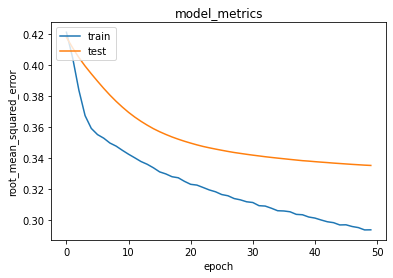

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Dari visualisasi metrik RMSE pada model, terlihat bahwa model konvergen sekitar **epochs ke-50**.  

Plot metrik menunjukkan nilai error (MSE) yang cukup kecil.  

Nilai RMSE akhir yang diperoleh:  
- **Training:** 0.2939  
- **Validasi:** 0.3353  

Nilai RMSE yang kecil ini menunjukkan model mampu memprediksi preferensi pengguna terhadap item dengan baik.  

Sehingga, rekomendasi yang dihasilkan oleh model cukup akurat dan dapat diandalkan.
